#   **Projet Maths Info Horsin/Cattan**





Soit $f :  \mathbb{R^2} \to \mathbb{R}$ et $c \in \mathbb{R}$.

Le but du projet est de trouver l'ensemble $\{ \:(x,y) \:/ \:f(x,y)=c \: \}$.

# 1ère Partie: **Contour Simple**

## L'amorce

Nous avons choisi d'utiliser un algorithme dichotomique dans un premier temps, qui est plus robuste qu'un algorithme de Newton. En effet, n'ayant aucune information sur la valeur initiale (indispensable pour garantir la convergence), il semble plus cohérent d'utiliser une dichotomie.
 

In [1]:
def find_seed(f, c=0.0, x=0.0, eps = 2**(-26)):
    if not f(x,1.0)<= c <= f(x,0.0) and not f(x,0 )<= c <= f(x,1.0):
            return None  
    a = 0
    b = 1
    t = 0.5
    while abs(f(x,t)-c) > eps :  
        if (f(x,a)-c)*(f(x,t)-c) >= 0:
            a = t
        else :
            b = t
        t = (a+b)/2
    return t 

### Le contour simple

Pour la suite, nous allons définir quelques fonctions dont nous aurons besoin pour la fonction simple_contour.
Commençons par importer les bibliothèques utiles.

In [2]:
import matplotlib.pyplot as plt  
import autograd
from autograd import numpy as np

Définissons maintenant une fonction permettant de calculer une distance euclidienne dans $\mathbb{R^2}$

In [3]:
def distanceeucl(x, y):
    return np.sqrt(((x[0]-y[0])**2)+((x[1]-y[1])**2))

Définissons ensuite une fonction permettant de donner à un vecteur une norme souhaitée.

In [4]:
def normalisation(vecteur,normev):
    norme = distanceeucl(vecteur,(0,0))
    x = vecteur[0]
    y = vecteur[1]
    return (x*normev/norme, y*normev/norme)

Définissons enfin la fonction gradient qui calcule le gradient à l'aide de la bibliothèque autograd. 

In [5]:
def grad(f, x, y):
    g = autograd.grad
    return np.r_[g(f, 0)(x, y), g(f, 1)(x, y)]

On définit le système à deux équations, et la matrice jacobienne associée.

In [6]:
def F(x, y): #on définit le système à 2 équations
        return np.array([f(x,y) - c,(x - point_précédent[0])**2 + (y - point_précédent[1])**2 - delta**2])
        
def Jacob(F, x, y):  #on définit la jacobienne.
    j = autograd.jacobian
    return np.c_[j(F,0)(x, y),j(F,1)(x, y)]

Nous pouvons maintenant définir la fonction simple_contour qui blablabla faut expliquer et commenter le programme

In [11]:
def simple_contour(f,c=0.0,delta=0.01):
    #on commence par initialiser le programme en calculant le deuxième point
    
    X = [0.0]  #on définit un premier point sur l'arête gauche à l'aide de find_seed
    if find_seed != None:
        Y = [find_seed(f,c,0.0)]
    else:
        return "première valeur pas entre f(a) et f(b)"
    
    point_précédent = [X[-1],Y[-1]]
    gradient = grad(f, point_précédent[0], point_précédent[1]) #on calcule le gradient au premier point trouvé
    tangente = [-gradient[1], gradient[0]] #le gradient dirige la normale à la tangente.
    tangente_normalisée = normalisation(tangente, delta) #la norme du vecteur tangent est delta
    
    if tangente_normalisée[0] >= 0 :  #on vérifie que le point choisi en second partira bien vers la droite (x>=0)
        deuxième_point = (point_précédent[0] + tangente_normalisée[0],
                          point_précédent[1] + tangente_normalisée[1]
                         )
    else : 
        deuxième_point = (point_précédent[0] - tangente_normalisée[0],
                          point_précédent[1] - tangente_normalisée[1]
                         )
         
    nouveau_point = np.array(deuxième_point)
    def F(x, y): #on définit le système à 2 équations
        return np.array([f(x,y) - c,(x - point_précédent[0])**2 + (y - point_précédent[1])**2 - delta**2])
        
    def Jacob(F, x, y):  #on définit la jacobienne.
        j = autograd.jacobian
        return np.c_[j(F,0)(x, y),j(F,1)(x, y)]
    
    A = F( nouveau_point[0],  nouveau_point[1])   #matrice associéé au système 2x2
    
    while distanceeucl(A,[0,0]) >= 2**(-10) :
        nouveau_point =  nouveau_point - np.linalg.inv(Jacob(F,  nouveau_point[0], nouveau_point[1])).dot(np.array(A))
        A = F( nouveau_point[0],  nouveau_point[1])
    X += [ nouveau_point[0]]
    Y += [ nouveau_point[1]]
    
    
    while X[-1] < 1 and Y[-1] < 1 and X[-1] > 0:
        distance = []
        point_précédent = [X[-1], 
                           Y[-1]
                          ]
    
        gradient = grad(f, point_précédent[0], point_précédent[1])
        tangente=[-gradient[1],gradient[0]]
        tangente_normalisée = normalisation(tangente,delta)
        point1 = [point_précédent[0] + tangente_normalisée[0],
                  point_précédent[1] + tangente_normalisée[1]
                 ]
        
        point2 = [point_précédent[0] - tangente_normalisée[0],
                  point_précédent[1] - tangente_normalisée[1]]
        liste_point = [point1, point2]
        
        for i in liste_point:            
            distance += [distanceeucl((X[-2], Y[-2]), i)]
            
        e = distance.index(max(distance))       
        nouveau_point = np.array(liste_point[e])
        def F(x, y): #on définit le système à 2 équations
            return np.array([f(x,y) - c,(x - point_précédent[0])**2 + (y - point_précédent[1])**2 - delta**2])
        
        def Jacob(F, x, y):  #on définit la jacobienne.
            j = autograd.jacobian
            return np.c_[j(F,0)(x, y),j(F,1)(x, y)]
        
        A = F(nouveau_point[0], nouveau_point[1])   # Il s'agit du point intermédiaire permettant d'initialiser Newton.
        
        while distanceeucl(A,[0,0]) >= 2**(-10):            
            A = F(nouveau_point[0],nouveau_point[1])
            nouveau_point = nouveau_point - np.linalg.inv(Jacob(F, nouveau_point[0], nouveau_point[1])).dot(np.array(A))
        X += [nouveau_point[0]]
        Y += [nouveau_point[1]]
    return [X, Y]

On peut maintenant définir des fonctions tests, et tester ce premier programme sur ces fonctions tests. 

In [12]:
def f(x,y):
    return 2*(np.exp(-x**2-y**2)-np.exp(-(x-1)**2-(y-1)**2))

def h(x,y):
    return x**2 + (y-0.4)**2

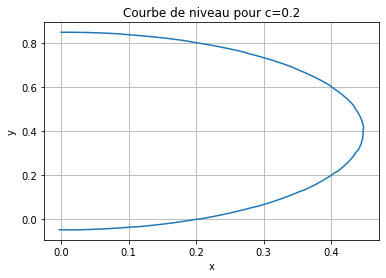

In [14]:
c=0.2
data=simple_contour(h,float(c))
#print(data)
plt.plot(data[0],data[1])
plt.grid()
plt.title(f"Courbe de niveau pour c={float(c)}")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# 2ème partie : Contour complexe